## Linear Algebra for Electrical Engineers HW2

2021 - fall (430.216, Professor Young Min Kim)

TAs: Cheoul-Hui Min and Junho Lee

### HW2: simulating linear dynamical systems and plotting the state trajectories

In this homework you will be asked to implement linear dynamical systems, which you have learned in class.

The homework consists of 3 problems:

    1. A linear dynamical system with fixed dynamics
    2. A linear dynamical system with changing dynamics
    3. Drawing fractals using linear dynamical systems

In [ ]:
# import required modules
import matplotlib.pyplot as plt
import numpy as np

Fill in the missing parts of the code below to get results similar to the images given in the pdf file 

### Problem 1 : Simulation of the SIR model

Hopefully, you will remember the SIR model from class. 
This problem will ask you to implement and simulate this model in the form of linear dynamical systems.

Let's define the state $x_t$ as the portion of the population that are susceptible, infected, immune, deceased to or by the COVID-19 virus at timestep $t$.

That is, $x_t$ is a vector of 4 elements that have values between 0 and 1 and sum to 1.

Next, let's define the epidimic dynamics matrix $A$

Over each day, the state changes according to the following rules:

1. among susceptible population:
    - $5$% get infected
    - $95$% remain susceptible
2. among infected population:
    - $1$% dies
    - $10$% recovers with immunity
    - $4$% recover without immunity(back to being susceptible)
    - $85$% remain infected
3. all immune and dead people remain in their states

In [ ]:
# Define state transition array
# TODO
trans=np.array([[0.95, 0.04, 0, 0], [0.05, 0.85, 0, 0], [0, 0.1, 1, 0], [0, 0.01, 0, 1]])

In [ ]:
# Set timesteps to 100
timesteps = 100

In [ ]:
# Where to record the state trajectory
SIR = np.zeros(shape=(timesteps, 4))

In [ ]:
# Initial state value
SIR[0] = np.array([1, 0, 0, 0])

In [ ]:
# Simulate 
# TODO
for i in range(timesteps-1):
  SIR[i+1]=trans@np.transpose(SIR[i])

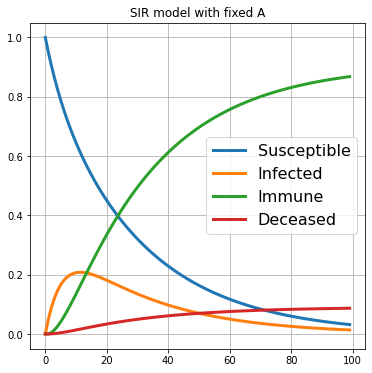

In [ ]:
# Now let's plot the state trajectory
fig, ax = plt.subplots(figsize=(6, 6))
label = ['Susceptible', 'Infected', 'Immune', 'Deceased']
for idx in range(len(label)):
    ax.plot(SIR[:, idx], lw=3, label=label[idx])
ax.grid()
ax.legend(fontsize=16)
ax.set_title('SIR model with fixed A')
plt.show()

### Problem 2 : SIR model with changing dynamics

You have implemented an SIR model with fixed epidemic dynamics $A$.
However, the epidemic dynamics is not always necessarily fixed. For example, the introduction of vaccines will change how the epidemic behaves overtime.

In this problem, you will be asked to extend problem 1 to have changing epidemic dynamics.

For simplicity, let's say that the epidemic dynamics at time 0 $A_0$ is identical to the epidemic dynamics from problem 1.

But now, due to the introduction of vaccines, the rules change as follows for $A_t$

 - Among susceptible population:
     - $5 $% * $(0.99)^t$ acquires the disease
     - $95 $% * $(0.99)^t$ remain susceptible
 - For infected, immune, deceased population:
     - The rules stay the same a problem 1

In [ ]:
# Define state transition array
vaccine=np.zeros(())
def vaccinEff(step):
  return np.array([[0.95*0.99**step, 0.04, 0, 0], [0.05*0.99**step, 0.85, 0, 0], [1-0.99**step, 0.1, 1, 0], [0, 0.01, 0, 1]])

In [ ]:
# Set timesteps, declared where to save the state trajectory and initial state
timesteps = 100
SIR = np.zeros(shape=(timesteps, 4))
SIR[0] = np.array([1, 0, 0, 0])

In [ ]:
# Fill in the blank and simulate for 100 timesteps
# Calculate next step and update A
# TODO
for i in range(timesteps-1):
  SIR[i+1]=vaccinEff(i)@SIR[i]

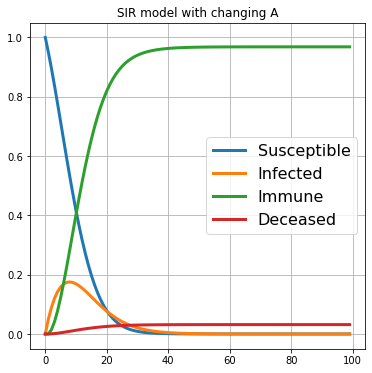

In [ ]:
# Now, let's plot the state trajectory
fig, ax = plt.subplots(figsize=(6, 6))
label = ['Susceptible', 'Infected', 'Immune', 'Deceased']
for idx in range(len(label)):
    ax.plot(SIR[:, idx], lw=3, label=label[idx])
ax.grid()
ax.legend(fontsize=16)
ax.set_title('SIR model with changing A')
plt.show()

### Problem 3: drawing fractals

In this problem, you will be asked to draw fractals using dynamic systems and affine transformation.

Recall from your classes that when some offset is present, the linear dynamical system can be written as

\begin{gather}
x_{t+1} = A_t x_t + c_t
\end{gather}

 Different from problems above, we define more than one dynamics to draw fractals. That is, for a state space of  two coordinates in 2D,

\begin{gather}
x_{t+1} = 
\begin{bmatrix}
0.86 & 0.03\\
-0.03& 0.86
\end{bmatrix}
x_t
+ 
\begin{bmatrix}
0\\
1.5
\end{bmatrix}
, with \;probablity \;0.79
\end{gather}


\begin{gather}
x_{t+1} = 
\begin{bmatrix}
0.2 & -0.25\\
0.21& 0.23
\end{bmatrix}
x_t
+ 
\begin{bmatrix}
0\\
1.5
\end{bmatrix}
, with \;probablity \;0.11
\end{gather}

\begin{gather}
x_{t+1} = 
\begin{bmatrix}
-0.15 & 0.27\\
0.25& 0.26
\end{bmatrix}
x_t
+ 
\begin{bmatrix}
0\\
0.45
\end{bmatrix}
, with \;probablity \;0.07
\end{gather}

\begin{gather}
x_{t+1} = 
\begin{bmatrix}
0 & 0\\
0& 0.17
\end{bmatrix}
x_t
+ 
\begin{bmatrix}
0\\
0
\end{bmatrix}
, with \;probablity \;0.03
\end{gather}

That is, instead of a fixed transition, we apply one of the four transitions regarding their probabilities

In [ ]:
# Let's define A's and c's
# TODO
A=np.array([[[0.86, 0.03], [-0.03, 0.86]],[[0.2, -0.25], [0.21, 0.23]], [[-0.15, 0.27], [0.25, 0.26]], [[0, 0], [0, 0.17]]])
C=np.array([np.transpose(np.array([0, 1.5])), np.transpose(np.array([0, 1.5])), np.transpose(np.array([0, 0.45])), np.transpose(np.array([0, 0]))])

In [ ]:
# define the number of timesteps and where to save the trajectory
timesteps = 30000
X = np.zeros((2, timesteps))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Simulate
# TODO
random=np.random.rand(timesteps)
for i in range(timesteps-1):
  this=np.array([X[0][i],X[1][i]])
  next=np.zeros((2,1))
  if random[i]<0.03:
    next=A[3]@this+C[3]
  elif random[i]<0.1:
    next=A[2]@this+C[2]
  elif random[i]<0.21:
    next=A[1]@this+C[1]
  else:
    next=A[0]@this+C[0]
  X[0][i+1]=next[0]
  X[1][i+1]=next[1]

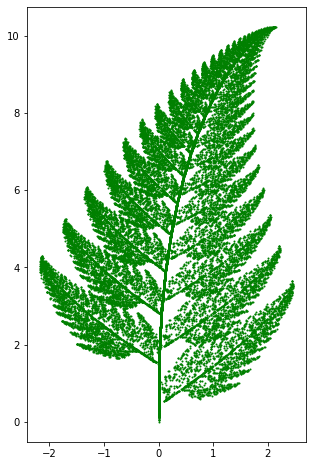

In [ ]:
# Now, lets plot the state trajectory
fig, ax = plt.subplots(figsize = (5,8))
ax.scatter(X[0,:],X[1,:], s = 1, color = 'g')
plt.show()

In [ ]:
# That's it!